## Try 8.4.1: Loss functions for classification in Python.


* **The code below computes the log loss for a logistic regression model on the Wisconsin breast cancer dataset.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [1]:
# Import packages and functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# Load the Wisconsin Breast Cancer dataset
WBCD = pd.read_csv('WisconsinBreastCancerDatabase.csv')

In [15]:
WBCD.head()

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# Convert Diagnosis to 0 and 1
WBCD.loc[WBCD['Diagnosis'] == 'B', 'Diagnosis'] = 0
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis'] = 1

In [19]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)

In [21]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

In [23]:
# Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression();
logisticModel.fit(X_train, np.ravel(y_train.astype(int)));

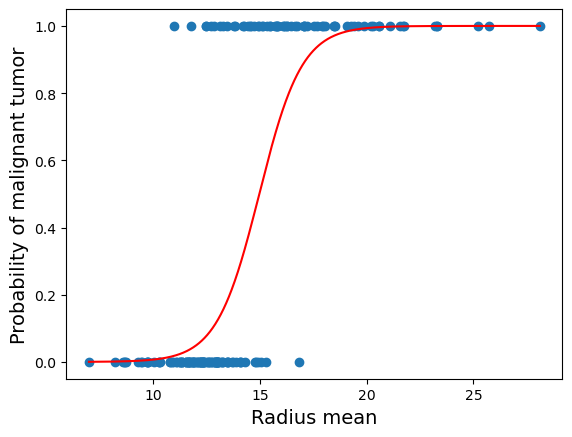

In [25]:
# Graph logistic regression probabilities
plt.scatter(X_test, y_test)
x_prob = np.linspace(X_test.min(), X_test.max(), 1000)
y_prob = logisticModel.predict_proba(x_prob.reshape(-1, 1))[:, 1]
plt.plot(x_prob, y_prob, color='red')
plt.xlabel('Radius mean', fontsize=14);
plt.ylabel('Probability of malignant tumor', fontsize=14);

In [27]:
# Predict the probabilities for the test set
p_hat = logisticModel.predict_proba(X_test)

In [29]:
# Display the log-loss
metrics.log_loss(y_test, p_hat)

0.31342546048710146